## 1. Load bioactivity data

In [14]:
import pandas as pd

In [15]:
df1 = pd.read_csv('COVID19_03_bioactivity_data_curated.csv')
df1

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0,intermediate
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0,active
...,...,...,...,...
2617,CHEMBL4798527,Cc1ccc(NC(=O)c2ccc(C)c(C(F)(F)F)c2)cc1C#Cc1nn(...,165.0,active
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,2000.0,intermediate
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,7491.0,intermediate
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,1000.0,active


## 2. Remove smiles notations (column) from the data file

In [16]:
# Drop smiles column from the data file
df2 = df1.drop(columns='canonical_smiles')

In [17]:
smiles = []

for i in df1.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [18]:
# Save data after cleaning smiles files
df3 = pd.concat([df2,smiles], axis=1)
df3

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL68920,300.0,active,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL69960,400.0,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
2,CHEMBL67057,100.0,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
3,CHEMBL65848,5000.0,intermediate,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
4,CHEMBL69629,100.0,active,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...
...,...,...,...,...
2617,CHEMBL4798527,165.0,active,Cc1ccc(NC(=O)c2ccc(C)c(C(F)(F)F)c2)cc1C#Cc1nn(...
2618,CHEMBL4799738,2000.0,intermediate,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...
2619,CHEMBL4869634,7491.0,intermediate,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...
2620,CHEMBL4871361,1000.0,active,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...


## 3. Calculate Lipinski descriptors

In [19]:
# Import rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [20]:
# Calculate molecular descriptors
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [21]:
df_lipinski = lipinski(df3.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,559.630,4.82482,3.0,7.0
3,470.533,3.31052,3.0,6.0
4,525.972,3.20392,4.0,7.0
...,...,...,...,...
2617,548.569,5.17224,3.0,7.0
2618,453.481,5.55700,3.0,6.0
2619,486.551,4.40710,2.0,7.0
2620,518.499,5.28630,3.0,6.0


In [22]:
# Combine data frames 
df4 = pd.concat([df1,df_lipinski], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active,383.814,4.45034,3.0,4.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active,482.903,3.61432,3.0,6.0
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active,559.630,4.82482,3.0,7.0
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0,intermediate,470.533,3.31052,3.0,6.0
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0,active,525.972,3.20392,4.0,7.0
...,...,...,...,...,...,...,...,...
2617,CHEMBL4798527,Cc1ccc(NC(=O)c2ccc(C)c(C(F)(F)F)c2)cc1C#Cc1nn(...,165.0,active,548.569,5.17224,3.0,7.0
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,2000.0,intermediate,453.481,5.55700,3.0,6.0
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,7491.0,intermediate,486.551,4.40710,2.0,7.0
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,1000.0,active,518.499,5.28630,3.0,6.0


## 4. Convert IC50 to pIC50

In [23]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x


In [24]:
df4.standard_value.describe()

count    2.622000e+03
mean     8.912932e+03
std      4.522367e+04
min      5.000000e-01
25%      5.000000e+01
50%      2.485600e+02
75%      3.490000e+03
max      1.600000e+06
Name: standard_value, dtype: float64

In [25]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [26]:
# Normalise the values in standard_value column

df5 = norm_value(df4)
df5

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,300.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,400.0
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,100.0
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,470.533,3.31052,3.0,6.0,5000.0
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,100.0
...,...,...,...,...,...,...,...,...
2617,CHEMBL4798527,Cc1ccc(NC(=O)c2ccc(C)c(C(F)(F)F)c2)cc1C#Cc1nn(...,active,548.569,5.17224,3.0,7.0,165.0
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,intermediate,453.481,5.55700,3.0,6.0,2000.0
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,intermediate,486.551,4.40710,2.0,7.0,7491.0
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,active,518.499,5.28630,3.0,6.0,1000.0


In [27]:
df5.standard_value_norm.describe()

count    2.622000e+03
mean     8.912932e+03
std      4.522367e+04
min      5.000000e-01
25%      5.000000e+01
50%      2.485600e+02
75%      3.490000e+03
max      1.600000e+06
Name: standard_value_norm, dtype: float64

In [28]:
df6 = pIC50(df5)
df6

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.397940
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,470.533,3.31052,3.0,6.0,5.301030
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,7.000000
...,...,...,...,...,...,...,...,...
2617,CHEMBL4798527,Cc1ccc(NC(=O)c2ccc(C)c(C(F)(F)F)c2)cc1C#Cc1nn(...,active,548.569,5.17224,3.0,7.0,6.782516
2618,CHEMBL4799738,Cn1cc(-c2ccc3c(Nc4cccc(NC(=O)Nc5cccc(F)c5)c4)n...,intermediate,453.481,5.55700,3.0,6.0,5.698970
2619,CHEMBL4869634,CC(C)Oc1cc(F)ccc1Nc1ncnc2ccc(-c3ccc(C(=O)N4CCN...,intermediate,486.551,4.40710,2.0,7.0,5.125460
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,active,518.499,5.28630,3.0,6.0,6.000000


In [29]:
df6.pIC50.describe()

count    2622.000000
mean        6.411872
std         1.204387
min         2.795880
25%         5.457180
50%         6.604576
75%         7.301030
max         9.301030
Name: pIC50, dtype: float64

In [30]:
# Save the file as CSV file (3 classes: active, inactive, intermediate)

df6.to_csv('COVID19_04_bioactivity_data_3class_pIC50.csv')

In [31]:
# Remove the intermediate class

df7 = df6[df6['class'] != 'intermediate']
df7

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.397940
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,7.000000
5,CHEMBL66570,CCN1CCN(C(=O)c2cc(C)c(/C=C3\C(=O)Nc4ncnc(Nc5cc...,active,509.973,3.91962,3.0,6.0,7.000000
...,...,...,...,...,...,...,...,...
2615,CHEMBL4759405,Cc1ccc(C2=N/C(=C/c3ccc(Cl)cc3)C(=O)NN2C(=O)Cc2...,active,578.032,4.28284,2.0,7.0,6.198116
2616,CHEMBL4753913,COc1ccc(/C=C2/N=C(c3ccc(Cl)cc3)N(C(=O)Cc3nc4c(...,active,594.031,3.98302,2.0,8.0,6.062633
2617,CHEMBL4798527,Cc1ccc(NC(=O)c2ccc(C)c(C(F)(F)F)c2)cc1C#Cc1nn(...,active,548.569,5.17224,3.0,7.0,6.782516
2620,CHEMBL4871361,CC(C)n1cc(C(=O)Nc2cc(F)c(-c3c[nH]c4ncnc(N)c34)...,active,518.499,5.28630,3.0,6.0,6.000000


In [32]:
# Save the file to CSV file (2 classes: active, inactive)

df7.to_csv('COVID19_05_bioactivity_data_2class_pIC50.csv')

## 5. Exploratory Data Analysis

In [33]:
# Importing seaborn

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### 5.1 Frequency Plot of bioactive classes (active and inactive)

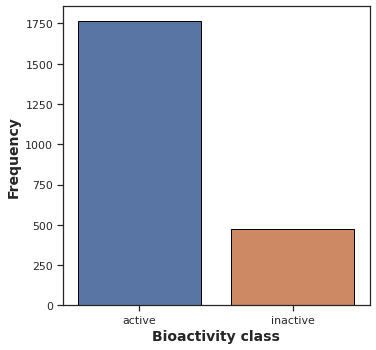

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df7, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class')

### 5.2 Scatter plot of MW versus LogP

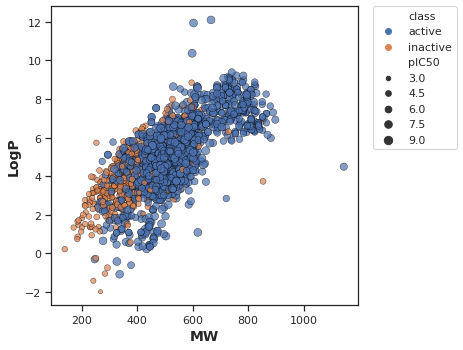

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df7, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP')

### 5.3 Box Plot

### 5.3.1 pIC50 Value

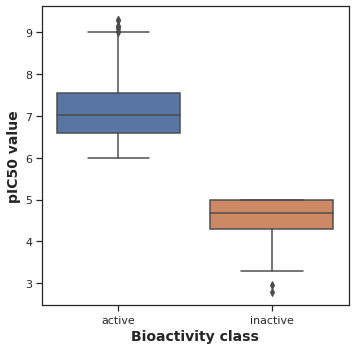

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df7)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50')


In [37]:
# Statistical analysis | Mann-Whitney U Test

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df8 = df7[selection]
  active = df8[df8['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df8 = df7[selection]
  inactive = df8[df8['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [38]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,2.392317e-245,0.05,Different distribution (reject H0)


### 5.3.2 MW

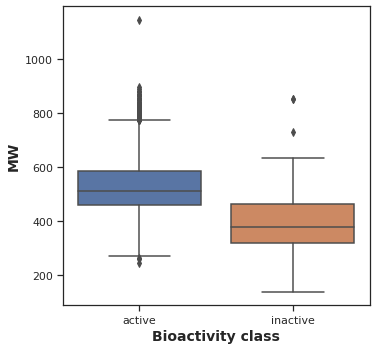

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df7)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW')

In [40]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,154294.5,2.156391e-98,0.05,Different distribution (reject H0)


### 5.3.3 LogP

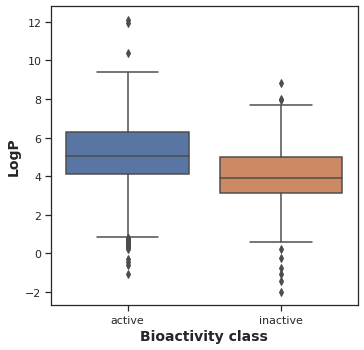

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df7)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP')

In [42]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,249267.0,2.927129e-41,0.05,Different distribution (reject H0)


### 5.3.4 NumHDonors

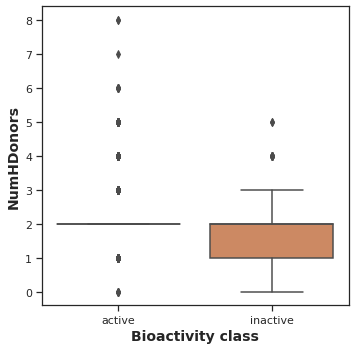

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df7)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors')

In [44]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,283085.5,1.186238e-31,0.05,Different distribution (reject H0)


### 5.3.5 NumHAcceptors

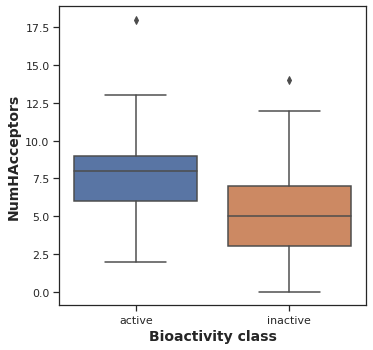

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df7)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors')


In [46]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,163331.5,8.528276e-94,0.05,Different distribution (reject H0)


In [47]:
! zip -r results.zip . -i *.csv *.pdf *.png

updating: COVID19_01_bioactivity_data_raw.csv (deflated 91%)
updating: COVID19_02_bioactivity_data_preprocessed.csv (deflated 83%)
updating: COVID19_03_bioactivity_data_curated.csv (deflated 84%)
updating: COVID19_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
updating: COVID19_05_bioactivity_data_2class_pIC50.csv (deflated 79%)
updating: mannwhitneyu_LogP.csv (deflated 9%)
updating: mannwhitneyu_MW.csv (deflated 9%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: mannwhitneyu_pIC50.csv (deflated 11%)
updating: plot_LogP.pdf (deflated 38%)
updating: plot_MW.pdf (deflated 38%)
updating: plot_MW_vs_LogP.pdf (deflated 3%)
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 37%)
updating: plot_bioactivity_class.pdf (deflated 39%)
updating: plot_ic50.pdf (deflated 36%)
  adding: Bar plot of RMSE values.png (deflated 18%)
  adding: Data visualization of model performance.png (defla